# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les bulletins d'une année donnée

In [3]:
# Choisir une année
year = 1861

In [4]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['Bxl_1861_Tome_II1_Part_1.txt',
 'Bxl_1861_Tome_II1_Part_2.txt',
 'Bxl_1861_Tome_II1_Part_3.txt',
 'Bxl_1861_Tome_II1_Part_4.txt',
 'Bxl_1861_Tome_II1_Part_5.txt']

In [5]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [6]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

5

In [7]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'V I L L E DE B R U X E L L E S\n\nB U L L E T I N COMMUNAL.\nAnnée\n\n1861.\n\nDEUXIEME SEMESTRE.\n\nBRUXELLES,\n\n\x0c\x0cVILLi:\n\nDE\n\nBRUXELLES.\n\nBULLETIN COMMUNAL\nANJVÉË\n\ni86i.\n\nNLAILHO 18.\nSAMEDI 6 JUILLET.\n\ni^rix '

In [8]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [9]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

"V I L L E DE B R U X E L L E S\n\nB U L L E T I N COMMUNAL.\nAnnée\n\n1861.\n\nDEUXIEME SEMESTRE.\n\nBRUXELLES,\n\n\x0c\x0cVILLi:\n\nDE\n\nBRUXELLES.\n\nBULLETIN COMMUNAL\nANJVÉË\n\ni86i.\n\nNLAILHO 18.\nSAMEDI 6 JUILLET.\n\ni^rix d u\n\nPain.\n\nLe JJourgmeslrc de la ville de Bruxelles\nTi ï I * t u\n\nI\n\n.\n\nI I *\n\n. . .\n\nInforme le public qu'il résulte des rapports des officiers de\npolice (pie le |)uiii de ménage se vend à :\n7)H cenl. par k i l . chez :\n\n35 cent, par kil. chez :\nDelaet, rue Haute, G3.\nAnlhonissen, r. Remp.-des-Moi"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [10]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [11]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1861_clean.txt!'

In [12]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'communal année deuxieme semestre bruxelles villi bruxelles bulletin communal anjvéë nlailho samedi juillet rix pain jjourgmeslrc bruxelles informe public résulte rapports officiers police pie uiii ménage vend cenl chez cent kil chez delaet rue haute anlhonissen remp moines sterkendries rue évêque tor bin rue bateaux huo velds rue pierres luc ucs rierres cent kil chez dépûl rue teinturiers derammeleer rue bavière cent kil chez jeiuyter rue schaerbeék schenis rue anderlechl eis rue herpels ruecran'

## Nuage de mots

### Afficher les termes les plus fréquents


In [13]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('rue', 740), ('conseil', 459), ('francs', 428), ('bruxelles', 393), ('administration', 293), ('bourgmestre', 290), ('collège', 286), ('section', 270), ('place', 219), ('art', 210)]


### Créer, stocker et afficher le nuage de mots

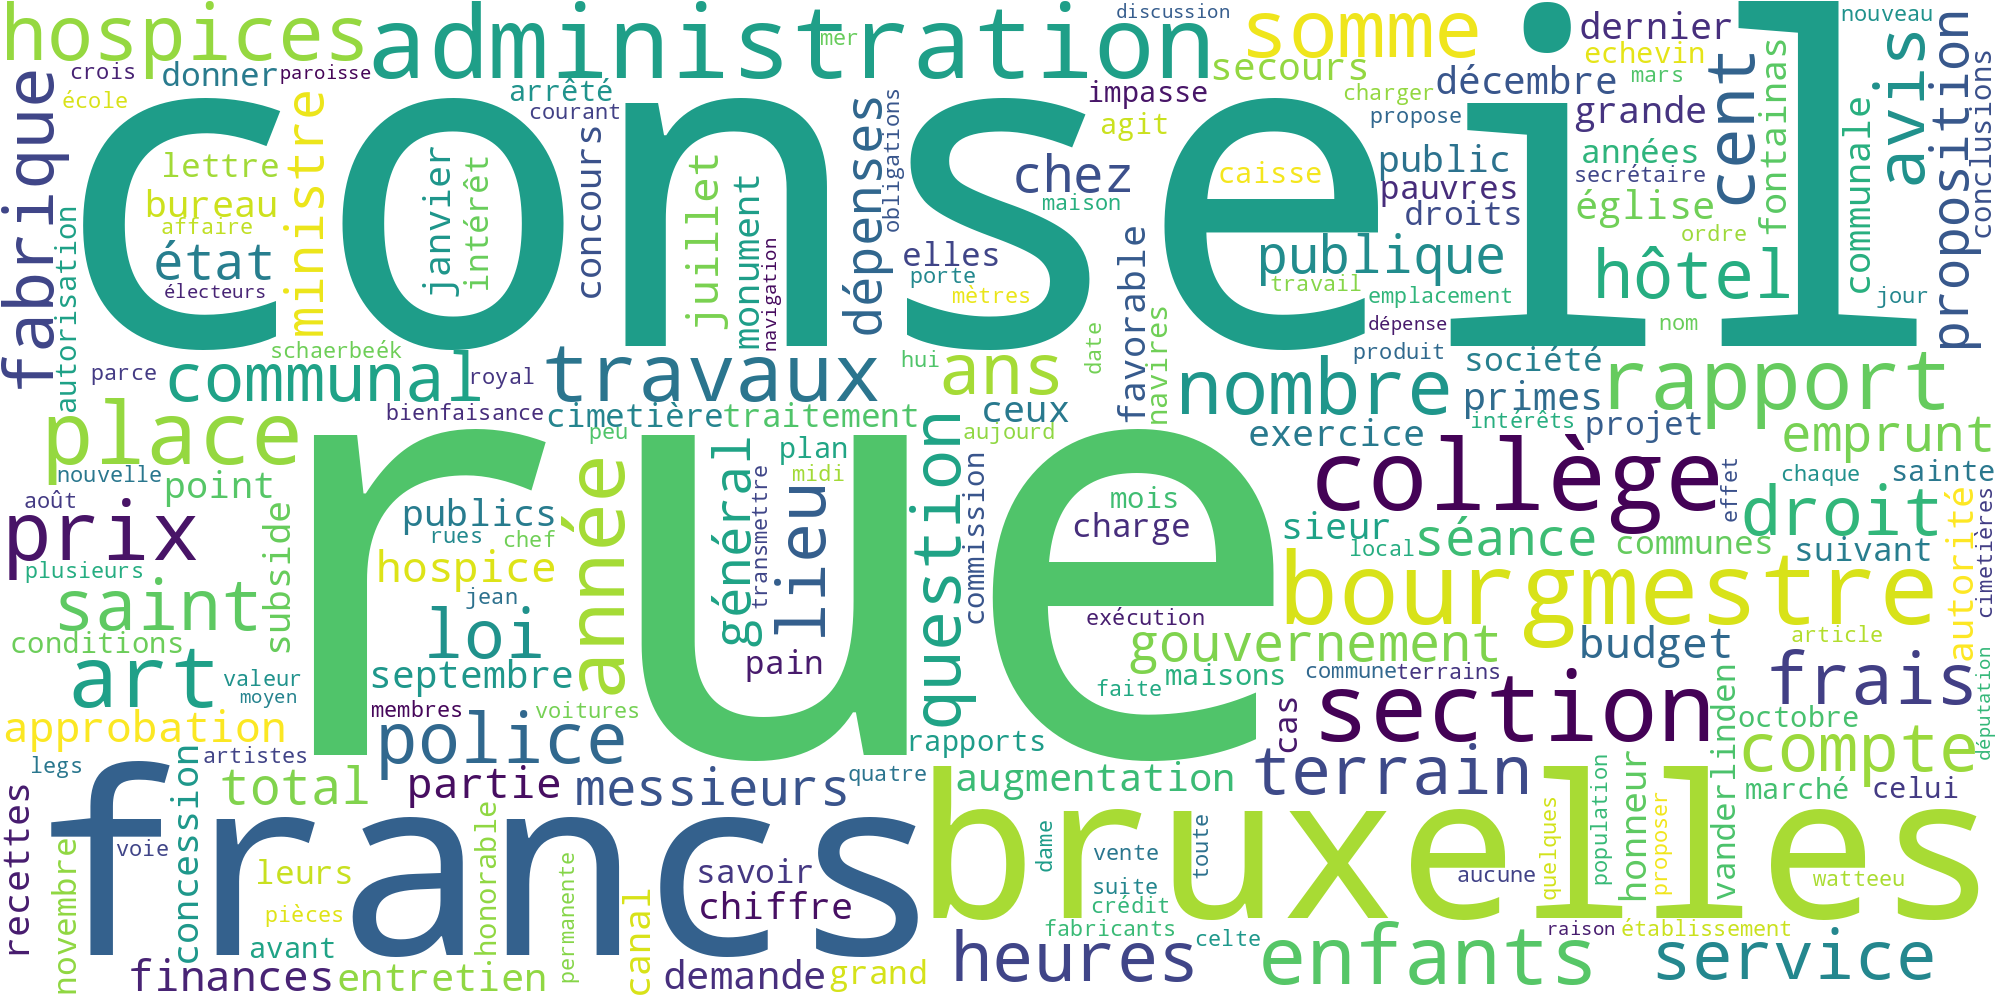

In [14]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))